In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Reference: https://uu.diva-portal.org/smash/get/diva2:1728483/FULLTEXT01.pdf

In [88]:
df_test = pd.read_csv('test.csv', sep=';')

In [89]:
df_test_fear = df_test[[col for col in df_test.columns if "Paura" in col and col != 'Paura (Altro)']]

In [90]:
print("Row: ", df_test.shape[0])
print("Col: ", df_test_fear.shape[1])

Row:  350
Col:  42


# PCA

https://www.keboola.com/blog/pca-machine-learning

## Scale Values

In [91]:
scaler = StandardScaler()
scaler.fit(df_test_fear)
scaled_df_test_fear = scaler.transform(df_test_fear)

## Covariance Matrix

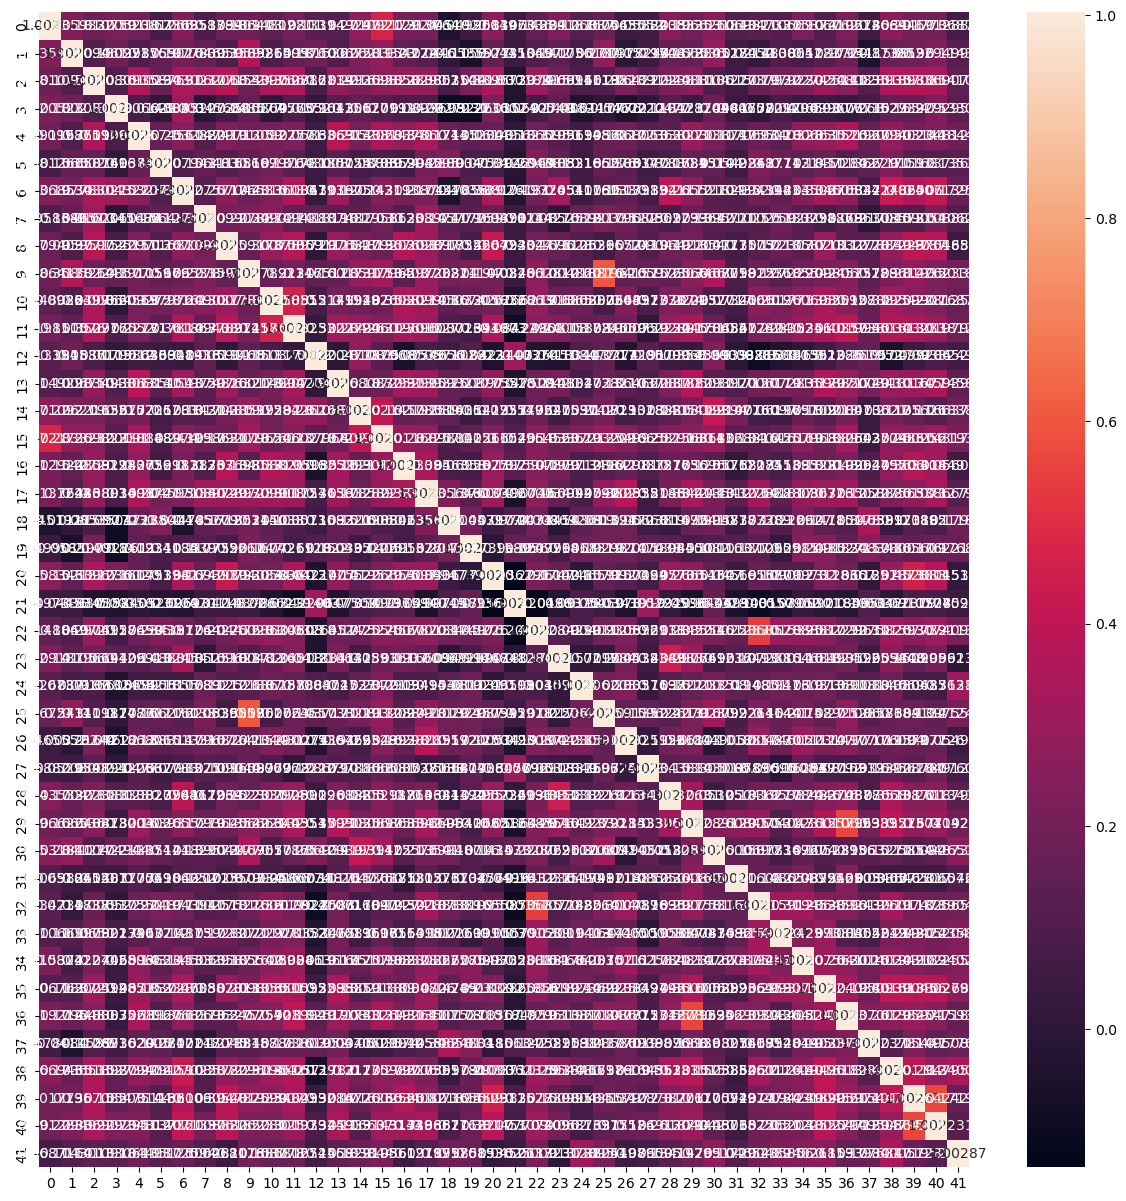

In [92]:
cov_matrix = np.cov(scaled_df_test_fear, rowvar=False)
# Create a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [93]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print('Eigenvalues: \n', eigenvalues)
print('Eigenvectors: \n', eigenvectors)

Eigenvalues: 
 [8.6903603  2.43113353 2.16719478 1.69369965 1.50408301 1.40287329
 1.30029203 1.26367267 1.16950011 1.0966879  1.07999612 1.03248288
 1.00464547 0.95280895 0.92381374 0.84137895 0.82813678 0.27952484
 0.78358564 0.76848744 0.75588211 0.29271679 0.30949812 0.3213582
 0.34314    0.35610243 0.37286055 0.39014335 0.71487351 0.69105963
 0.42233941 0.44213202 0.45526858 0.47794535 0.49468024 0.52195167
 0.53938762 0.63232497 0.6193066  0.57184463 0.58374832 0.59742164]
Eigenvectors: 
 [[ 0.14239863 -0.0242264  -0.26963516 ...  0.19331523 -0.10882991
  -0.01106847]
 [ 0.11456631 -0.1105639  -0.30860744 ...  0.1404364  -0.23736715
   0.41477521]
 [ 0.1921018   0.11836687 -0.0110551  ... -0.08320124 -0.16960749
  -0.08415095]
 ...
 [ 0.20340033  0.13479211 -0.0744022  ... -0.00120622  0.0774608
  -0.12604311]
 [ 0.20103271  0.13620374 -0.10750238 ... -0.04406276  0.19743509
  -0.11693895]
 [ 0.12828162 -0.17868809  0.08905099 ... -0.19695947 -0.03227766
  -0.12150744]]


Now we should select the top eignevalues

In [94]:
eigenvalues

array([8.6903603 , 2.43113353, 2.16719478, 1.69369965, 1.50408301,
       1.40287329, 1.30029203, 1.26367267, 1.16950011, 1.0966879 ,
       1.07999612, 1.03248288, 1.00464547, 0.95280895, 0.92381374,
       0.84137895, 0.82813678, 0.27952484, 0.78358564, 0.76848744,
       0.75588211, 0.29271679, 0.30949812, 0.3213582 , 0.34314   ,
       0.35610243, 0.37286055, 0.39014335, 0.71487351, 0.69105963,
       0.42233941, 0.44213202, 0.45526858, 0.47794535, 0.49468024,
       0.52195167, 0.53938762, 0.63232497, 0.6193066 , 0.57184463,
       0.58374832, 0.59742164])

# SKLEARN PCA

In [100]:
pca = PCA(n_components=4, svd_solver='full')
scaled_df_test_fear = pd.DataFrame(scaler.fit_transform(df_test_fear), columns=df_test_fear.columns)
pca.fit(scaled_df_test_fear)

PCA(n_components=4, svd_solver='full')

In [101]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.20632216 0.05771875 0.05145245 0.04021096]
[55.07209588 29.12843286 27.50183591 24.31257246]


In [102]:
pca.feature_names_in_

array(['Paura (Essere puniti)', 'Paura (Fare una brutta figura)',
       'Paura (Andare in ospedale)', 'Paura (Perdere una persona cara)',
       'Paura (Ammalarsi)', 'Paura (Incontrare estranei)',
       'Paura (Guerra)', 'Paura (fare un prelievo/tampone/puntura)',
       'Paura (Cadere da Luoghi alti)', 'Paura (Essere presi in giro)',
       'Paura (Serpenti)', 'Paura (Ladri)', 'Paura (Essere interrogati )',
       'Paura (Allagamenti)', 'Paura (Ricevere voti bassi)',
       'Paura (Essere rimproverati)', 'Paura (Bruciarsi)',
       'Paura (Tagliarsi o ferirsi)',
       'Paura (Essere in un luogo affollato)', 'Paura (Temporali)',
       'Paura (Essere investiti da una macchina o da un camion)',
       'Paura (Dover andare a scuola)', 'Paura (Fare giochi violenti)',
       'Paura (Ucraina)', 'Paura (Buio)', 'Paura (Essere criticati)',
       'Paura (Il sangue)',
       "Paura (Trattenersi a scuola dopo l'orario scolastico)",
       'Paura (Russia)', 'Paura (Pandemia)', 'Paura (Sbaglia

I valori che vedi nel DataFrame dei carichi (loadings) rappresentano i pesi di ciascuna variabile originale nel calcolo di ciascun componente principale. Questi pesi possono variare da -1 a 1.

Un valore di carico vicino a -1 o 1 indica che la variabile originale corrispondente contribuisce significativamente al componente principale, con il segno che indica la direzione della relazione. Un valore positivo indica che la variabile e il componente principale aumentano insieme, mentre un valore negativo indica che la variabile diminuisce quando il componente principale aumenta.

Un valore di carico vicino a 0 indica che la variabile originale ha poco o nessun effetto sul componente principale.

Quindi, in effetti, più il valore assoluto del carico è alto (cioè più vicino a -1 o 1), più quel componente principale è influenzato da quella variabile.

In [103]:
loadings = pd.DataFrame(pca.components_, columns=pca.feature_names_in_)

print(loadings)

   Paura (Essere puniti)  Paura (Fare una brutta figura)  \
0              -0.142399                       -0.114566   
1               0.024226                        0.110564   
2              -0.269635                       -0.308607   
3               0.148183                        0.169866   

   Paura (Andare in ospedale)  Paura (Perdere una persona cara)  \
0                   -0.192102                         -0.073786   
1                   -0.118367                         -0.096737   
2                   -0.011055                         -0.287427   
3                   -0.150639                          0.154204   

   Paura (Ammalarsi)  Paura (Incontrare estranei)  Paura (Guerra)  \
0          -0.172569                    -0.109255       -0.184797   
1           0.008973                     0.068909       -0.208673   
2           0.019333                     0.139314       -0.136244   
3          -0.061449                     0.073597        0.033727   

   Paura (fare un

# FACTOR ANALYZER

In [109]:
from factor_analyzer import FactorAnalyzer

# Assuming df is your DataFrame and n_factors is the number of components you want to keep (PCA VARIMAX ROTATION)
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
scaled_df_test_fear = pd.DataFrame(scaler.fit_transform(df_test_fear), columns=df_test_fear.columns)

fa.fit(scaled_df_test_fear)
factor_scores = fa.transform(scaled_df_test_fear)

# Convert factor scores into a DataFrame
df_scores = pd.DataFrame(factor_scores, columns=[f'Factor{i+1}' for i in range(factor_scores.shape[1])])

print(df_scores)

      Factor1   Factor2   Factor3   Factor4
0    0.496809 -0.153012 -1.886025  0.257918
1    0.726099  1.273974 -0.393946  1.513814
2   -0.518858  0.105778 -1.270831 -0.107602
3   -0.002569  1.030931  0.049738 -0.122429
4    0.490354  2.588277  0.477698  0.742075
..        ...       ...       ...       ...
345 -1.504704  0.351628 -0.486968  0.362412
346 -2.678925  0.104780  0.032106 -0.294009
347  0.168382 -0.518574 -0.709054  1.294946
348  0.848235  0.373354 -0.024620 -0.228585
349 -0.269527  0.729129 -0.662293  0.956329

[350 rows x 4 columns]


In [111]:
# Get factor loadings
loadings = fa.loadings_

# Convert loadings into a DataFrame
df_loadings = pd.DataFrame(loadings, index=df_test_fear.columns, columns=[f'Factor{i+1}' for i in range(loadings.shape[1])])

print(df_loadings)

                                                     Factor1   Factor2  \
Paura (Essere puniti)                               0.291037  0.034164   
Paura (Fare una brutta figura)                      0.173753 -0.006957   
Paura (Andare in ospedale)                          0.527878  0.213908   
Paura (Perdere una persona cara)                    0.250265 -0.128298   
Paura (Ammalarsi)                                   0.342514  0.284314   
Paura (Incontrare estranei)                         0.115838  0.321810   
Paura (Guerra)                                      0.576941  0.088672   
Paura (fare un prelievo/tampone/puntura)            0.168687  0.215760   
Paura (Cadere da Luoghi alti)                       0.568907  0.100186   
Paura (Essere presi in giro)                        0.136419  0.306350   
Paura (Serpenti)                                    0.407597  0.342684   
Paura (Ladri)                                       0.524997  0.270996   
Paura (Essere interrogati )           

In [108]:
df_loadings = pd.DataFrame(loadings, columns=scaled_df_test_fear.columns)

print(df_loadings)

ValueError: Shape of passed values is (42, 4), indices imply (42, 42)